<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#FashionMNIST" data-toc-modified-id="FashionMNIST-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><b>FashionMNIST</b></a></span></li><li><span><a href="#FashionMNIST" data-toc-modified-id="FashionMNIST-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><b>FashionMNIST</b></a></span></li><li><span><a href="#Данные" data-toc-modified-id="Данные-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><b>Данные</b></a></span></li><li><span><a href="#Задание" data-toc-modified-id="Задание-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><b>Задание</b></a></span></li></ul></div>

---

<h2 style="text-align: center;"><b>FashionMNIST</b></h2>

---

В этом ноутбуке Вам предстоит самостоятельно попрактиковаться в написаноо нейросетей для распознавания датасета, похожего на MNIST, но более интересного -- чёрно-белых изображений одежды.

<h2 style="text-align: center;"><b>FashionMNIST</b></h2>

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

<h2 style="text-align: center;"><b>Данные</b></h2>

Мы будем работать с картинками одежды (чёрно-белыми, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [2]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as nnopt
from tqdm import tqdm_notebook
from torch.optim import lr_scheduler
from torchvision import transforms
import torch
import torchvision

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor()])


trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transforms.Compose([transforms.ToTensor()]))
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transforms.Compose([transforms.ToTensor()]))
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sanvdal', 'shirt', 'sneaker', 'bag', 'ankle boot')

In [10]:
trainloader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [11]:
testloader.dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

Посмотрите на датасет.
* Сколько в нём классов? 10
* Сколько картинок в train? В test? 60000, 10000
* Выведите несколько картинок с помощью `pyplot`

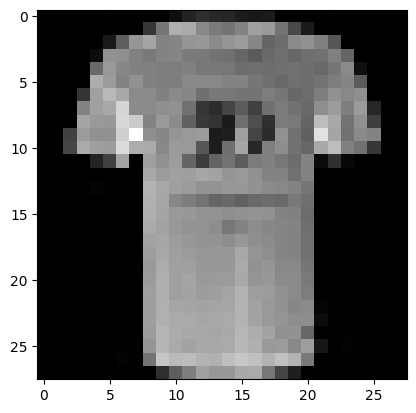

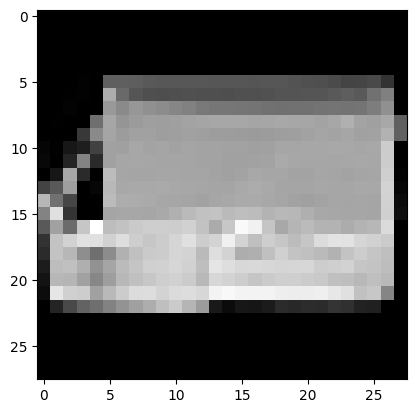

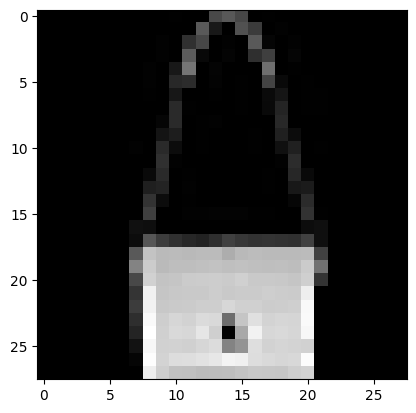

In [17]:
for _ in range(0,3):
    i = np.random.randint(low=0, high=50000)
    plt.imshow(trainloader.dataset.data[i],  cmap='gray')
    plt.show()


<h2 style="text-align: center;"><b>Задание</b></h2>

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите Свёрточную сеть, классифицирующую этот датасет.
Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [3]:
class SimpleConvNet(nn.Module):
    def __init__(self):

        super(SimpleConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(4 * 4 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 4 * 4 * 16) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [4]:
net = SimpleConvNet()

loss_fn = nn.CrossEntropyLoss()

num_epochs = 5
learning_rate = 1e-3
optimizer = nnopt.Adam(net.parameters(), lr=learning_rate)

# новая фишка -- динамически изменяем LR
scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

for epoch in tqdm_notebook(range(num_epochs)):
    
    scheduler.step()
    
    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(trainloader)):
        X_batch, y_batch = batch
        
        optimizer.zero_grad()

        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Обучение закончено')

C:\Users\artyo\AppData\Local\Temp\ipykernel_21308\1359338955.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(num_epochs)):


  0%|          | 0/5 [00:00<?, ?it/s]

f:\Нейросети\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
C:\Users\artyo\AppData\Local\Temp\ipykernel_21308\1359338955.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(trainloader)):


  0%|          | 0/15000 [00:00<?, ?it/s]

[1,  2000] loss: 0.874
[1,  4000] loss: 0.619
[1,  6000] loss: 0.542
[1,  8000] loss: 0.487
[1, 10000] loss: 0.458
[1, 12000] loss: 0.440
[1, 14000] loss: 0.422


  0%|          | 0/15000 [00:00<?, ?it/s]

[2,  2000] loss: 0.376
[2,  4000] loss: 0.380
[2,  6000] loss: 0.374
[2,  8000] loss: 0.374
[2, 10000] loss: 0.360
[2, 12000] loss: 0.351
[2, 14000] loss: 0.350


  0%|          | 0/15000 [00:00<?, ?it/s]

[3,  2000] loss: 0.309
[3,  4000] loss: 0.318
[3,  6000] loss: 0.308
[3,  8000] loss: 0.306
[3, 10000] loss: 0.303
[3, 12000] loss: 0.309
[3, 14000] loss: 0.311


  0%|          | 0/15000 [00:00<?, ?it/s]

[4,  2000] loss: 0.286
[4,  4000] loss: 0.256
[4,  6000] loss: 0.271
[4,  8000] loss: 0.266
[4, 10000] loss: 0.259
[4, 12000] loss: 0.261
[4, 14000] loss: 0.269


  0%|          | 0/15000 [00:00<?, ?it/s]

[5,  2000] loss: 0.250
[5,  4000] loss: 0.260
[5,  6000] loss: 0.255
[5,  8000] loss: 0.246
[5, 10000] loss: 0.258
[5, 12000] loss: 0.244
[5, 14000] loss: 0.258
Обучение закончено


In [5]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of t-shirt/top : 84 %
Accuracy of trouser : 97 %
Accuracy of pullover : 83 %
Accuracy of dress : 90 %
Accuracy of  coat : 79 %
Accuracy of sanvdal : 95 %
Accuracy of shirt : 66 %
Accuracy of sneaker : 96 %
Accuracy of   bag : 98 %
Accuracy of ankle boot : 94 %


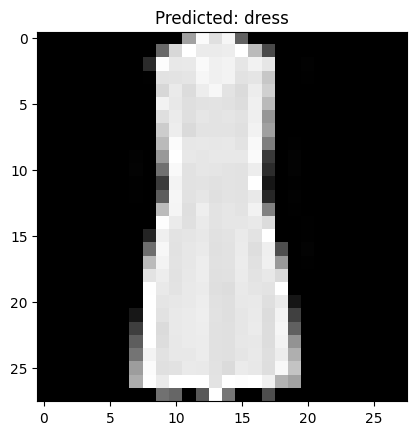

In [11]:
i = np.random.randint(low=0, high=10000)

def visualize_result(index):
    image = testloader.dataset.test_data[index].numpy()
    plt.imshow(image, cmap='gray')
    
    y_pred = net(torch.Tensor(image).view(1, 1, 28, 28))
    _, predicted = torch.max(y_pred, 1)
    
    plt.title(f'Predicted: {classes[predicted.numpy()[0]]}')

visualize_result(i)